# CS 2316 - Spring 2023 - HW06 Data Visualization
# HW06: This homework is due by Sunday, March 12th @ 11:59PM.

You are required to complete the missing bodies of the functions below.
Further instructions are provided in the comments ...
# A few tips:
   - Make sure you return the right value and datatype
   - <b>Pay attention to capitalization and small details. They matter.</b> 
   - Test your code for each function by uncommenting the respective test cases in the if __name__ == '__main__' block
   - Do not import modules within functions
   - Do not leave any print statements within your functions
   - Submit in Canvas as HW06.ipynb  - Your submission should be named exactly HW06.ipynb
   - <b>All outputs should be displayed before you submit. We will noy run your code to see the output.</b>
   - Print your variables as you code in order to see what values they have
   - <b> TAs are NOT allowed to provide ANY help with the extra credit assignment. This should be done entirely on your own. </b>

## HW06 Problem Setup:
    You LOVE movies, but your friends can't pick one to watch. Since this is your area of expertise, you decide to generate a dashboard of a wide variety of movies to give your friends some options (maybe too many). They love you for it. You're the best. 

    The following questions will walk you through the process of loading, cleaning,
    and transforming data to generate analysis points and visualizations.
    
    Note: There is NOT a specific library you have to use. All libraries covered in the Data Visualization handout
    have been imported in the cell below. This assignment will not have an autograder configured. Instead, visual
    guides for the output you should be generating are displayed under each question cell. 
    
## Extra Credit Opportunity:
    The final cell in this assignment gives you an opportunity to create an extra credit function.
    In order to receive a bonus 5pts, create a function that creates another visual with the given data frame.
    This visual must be significantly more advanced than the questions within this homework. If you simply submit a plain bar chart, box plot, histogram, scatterplot, pie chart, or trendline- you will not receive full credit.
    
    You are allowed to use any of the libraries we have discussed, and we recommend you peruse the documentation 
    for the matplotlib, seaborn, and plotly.express libraries. Try to make your visual interactive, engaging, and 
    draw a clear analysis. A 1-2 sentence description of your visual, describing the analysis point generated from 
    the visual, is necessary to receive any credit!

In [3]:
## Import Modules: Do not Change this cell###
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
""" Run this cell before completing any of the other problems."""

' Run this cell before completing any of the other problems.'

# Q1

You begin to impress your friends by loading in a dataset containing a wide range of movies (you don't want them to be limited in their choice, obviously).

Given a file name input (str), return a pandas DataFrame where column 0 of the file is the indices.

**Input:**

    file: str

**Returns:**

    movie_data: Pandas DataFrame

**Expected Output**:
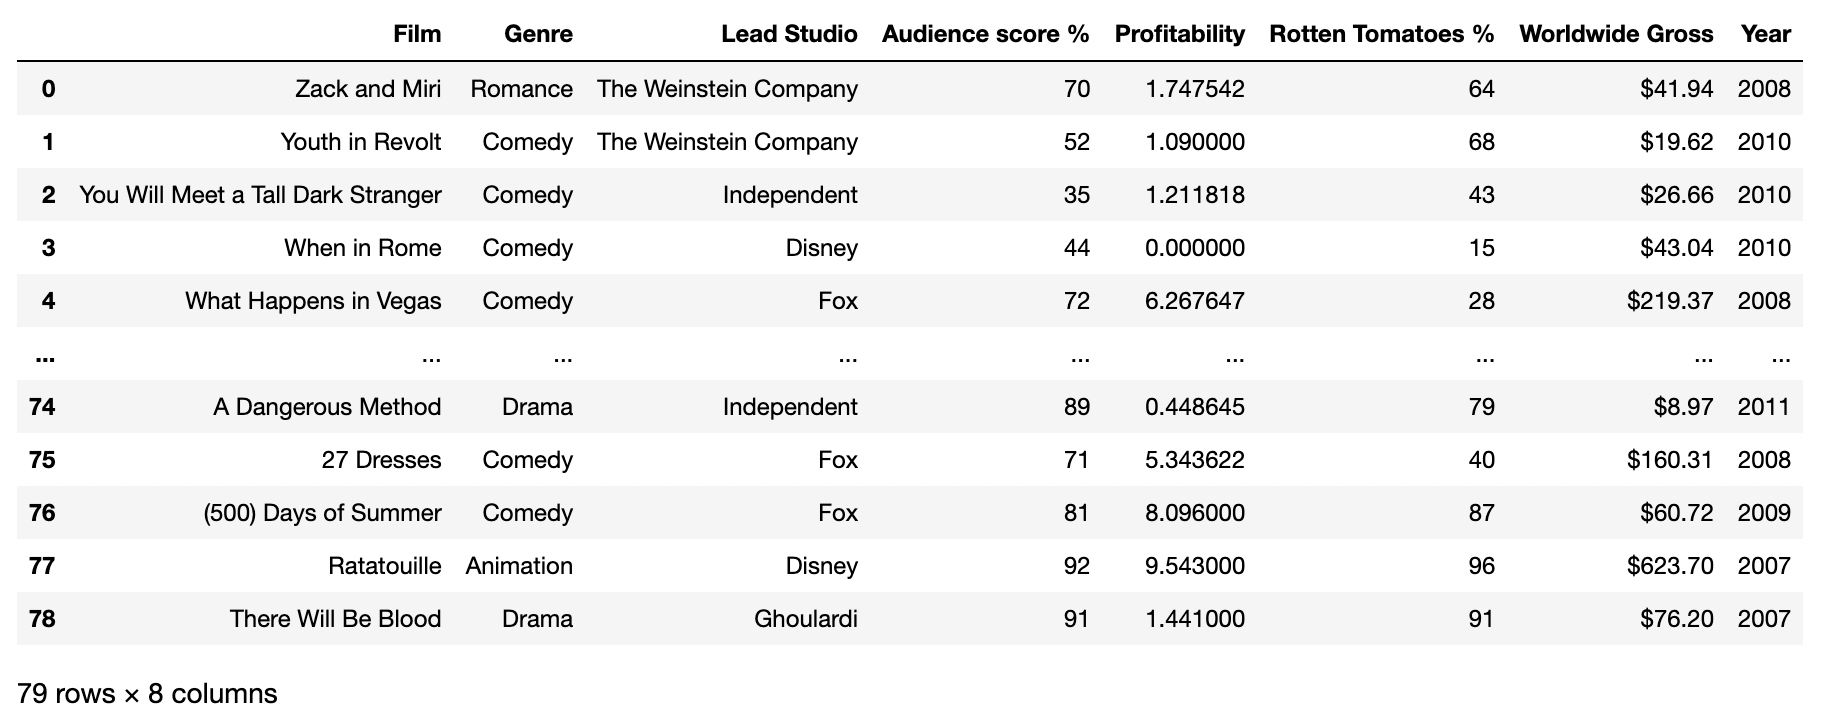

In [4]:
#### Write your code here####
def load_data(file):
    return pd.read_csv(file, index_col = 0)

In [5]:
####Test Case####
""" Run this cell before completing any of the other problems. This dataset is used as input."""
movie_data = load_data('movies.csv')
movie_data

Genre            Lead Studio  \
Film                                                                   
Zack and Miri                         Romance  The Weinstein Company   
Youth in Revolt                        Comedy  The Weinstein Company   
You Will Meet a Tall Dark Stranger     Comedy            Independent   
When in Rome                           Comedy                 Disney   
What Happens in Vegas                  Comedy                    Fox   
...                                       ...                    ...   
A Dangerous Method                      Drama            Independent   
27 Dresses                             Comedy                    Fox   
(500) Days of Summer                   Comedy                    Fox   
Ratatouille                         Animation                 Disney   
There Will Be Blood                     Drama              Ghoulardi   

                                    Audience score %  Profitability  \
Film                                                                  
Zack and Miri                                     70       1.747542   
Youth in Revolt                                   52       1.090000   
You Will Meet a Tall Dark Stranger                35       1.211818   
When in Rome                                      44       0.000000   
What Happens in Vegas                             72       6.267647   
...                                              ...            ...   
A Dangerous Method                                89       0.448645   
27 Dresses                                        71       5.343622   
(500) Days of Summer                              81       8.096000   
Ratatouille                                       92       9.543000   
There Will Be Blood                               91       1.441000   

                                    Rotten Tomatoes % Worldwide Gross  Year  
Film                                                                         
Zack and Miri                                      64         $41.94   2008  
Youth in Revolt                                    68         $19.62   2010  
You Will Meet a Tall Dark Stranger                 43         $26.66   2010  
When in Rome                                       15         $43.04   2010  
What Happens in Vegas                              28        $219.37   2008  
...                                               ...             ...   ...  
A Dangerous Method                                 79          $8.97   2011  
27 Dresses                                         40        $160.31   2008  
(500) Days of Summer                               87         $60.72   2009  
Ratatouille                                        96        $623.70   2007  
There Will Be Blood                                91         $76.20   2007  

[79 rows x 7 columns]

# Q2

You are going to visualize the distribution of the movies' rating.

Given the loaded dataframe from Q1, generate a scatter plot with trendline of the movies' audience score and Rotten Tomatoes rating.

The scatter plot should contain a legend such that point representing movies from one genre have a different color than another genre.

Note the expected output for all title and axis labels.

**Input:**

    movie_data: Pd DataFrame of Movie Data

**Returns:**

    None: When function is run, scatterplot is displayed
    
**Expected Output**:
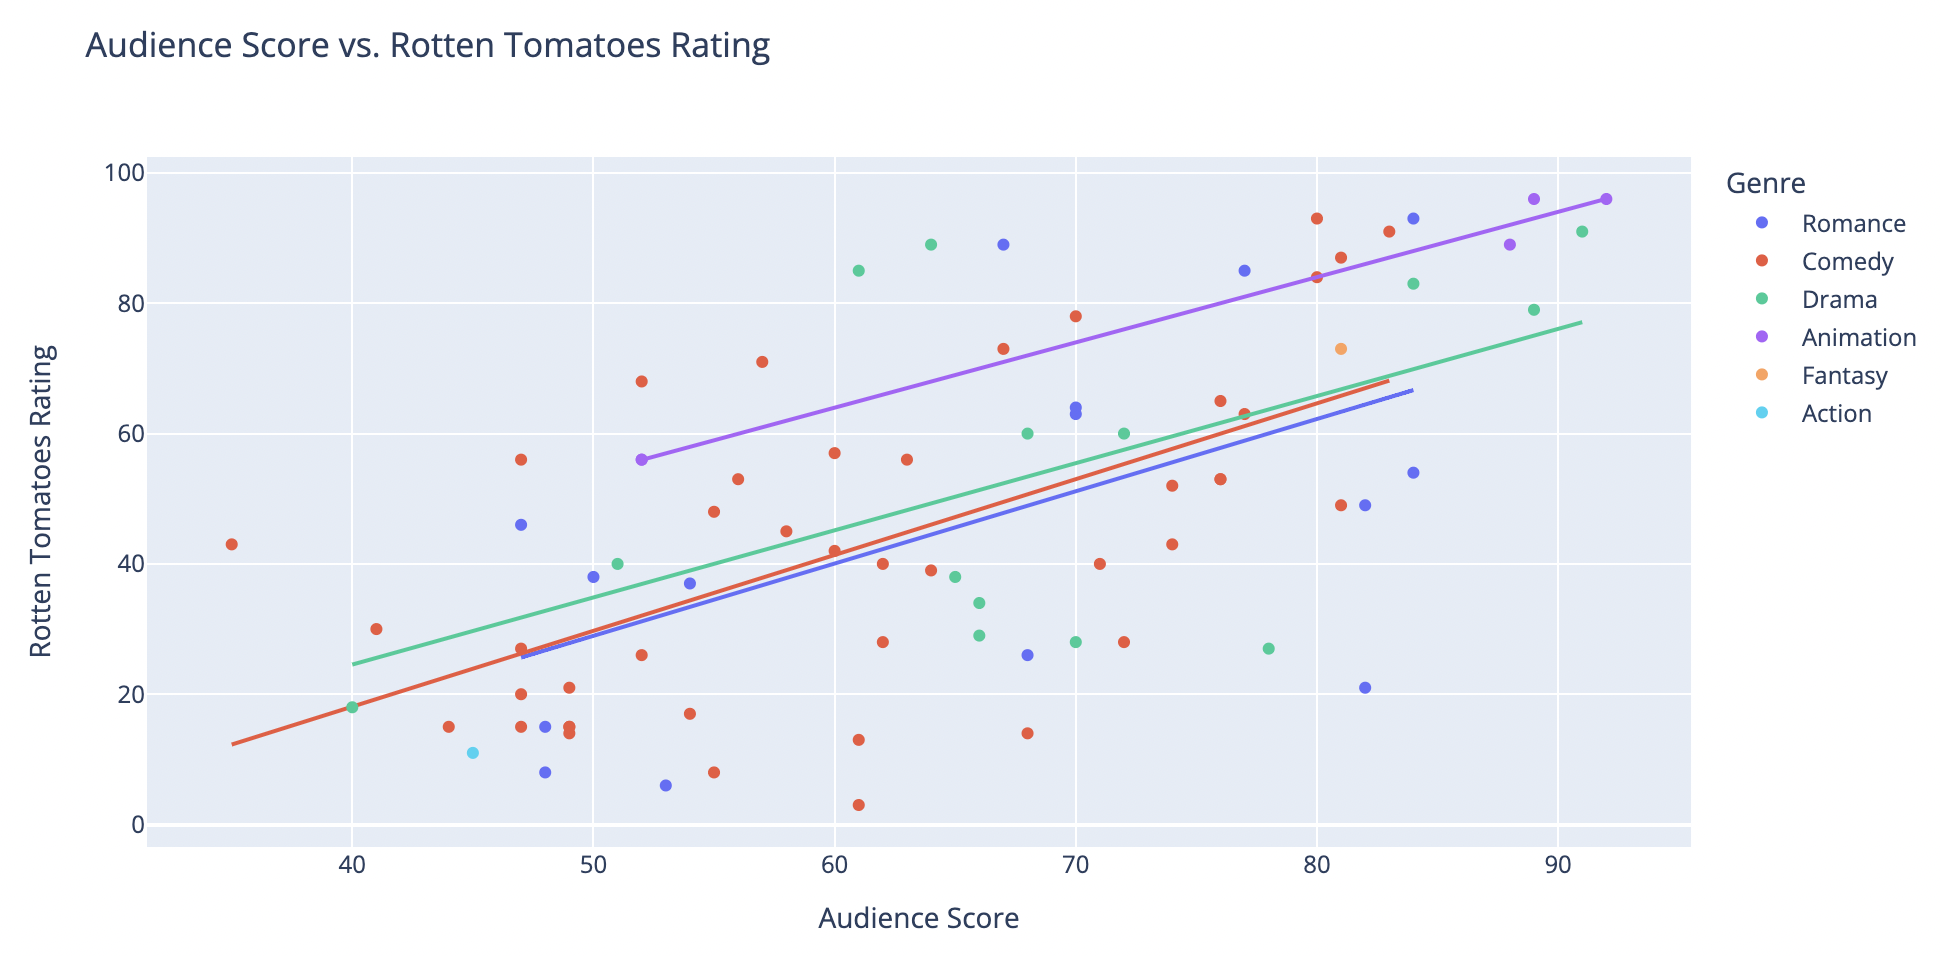

In [6]:
def movie_scatter(movie_data):
    fig = px.scatter(movie_data, x = 'Audience score %', y = 'Rotten Tomatoes %', color = 'Genre', trendline= 'ols' , labels = {'Audience score %': 'Audience Score', 'Rotten Tomatoes %': 'Rotten Tomatoes Rating'}, title = 'Audience Score vs. Rotten Tomatoes Rating')
    fig.show()

In [7]:
####Test Case####
movie_scatter(movie_data)

# Q3

You decide to choose the movie's genre by finding which genres are trending upward. Given the dataframe 'movie_data', find each genre's average 'Audience score %' for each year and plot it accordingly.

**Input:**

    movie_data: Pd DataFrame of Movie Data

**Returns:**

    None: When function is run, line graph is displayed

**Hints:** 
    - You will need to manipulate the movie_data dataframe to combine the genres for each year 
    - If the y-axis is displaying 'Year' as a float, Google solutions for 'Tick Formatting' (ie. https://plotly.com/python/tick-formatting/)
    
**Expected Output:**
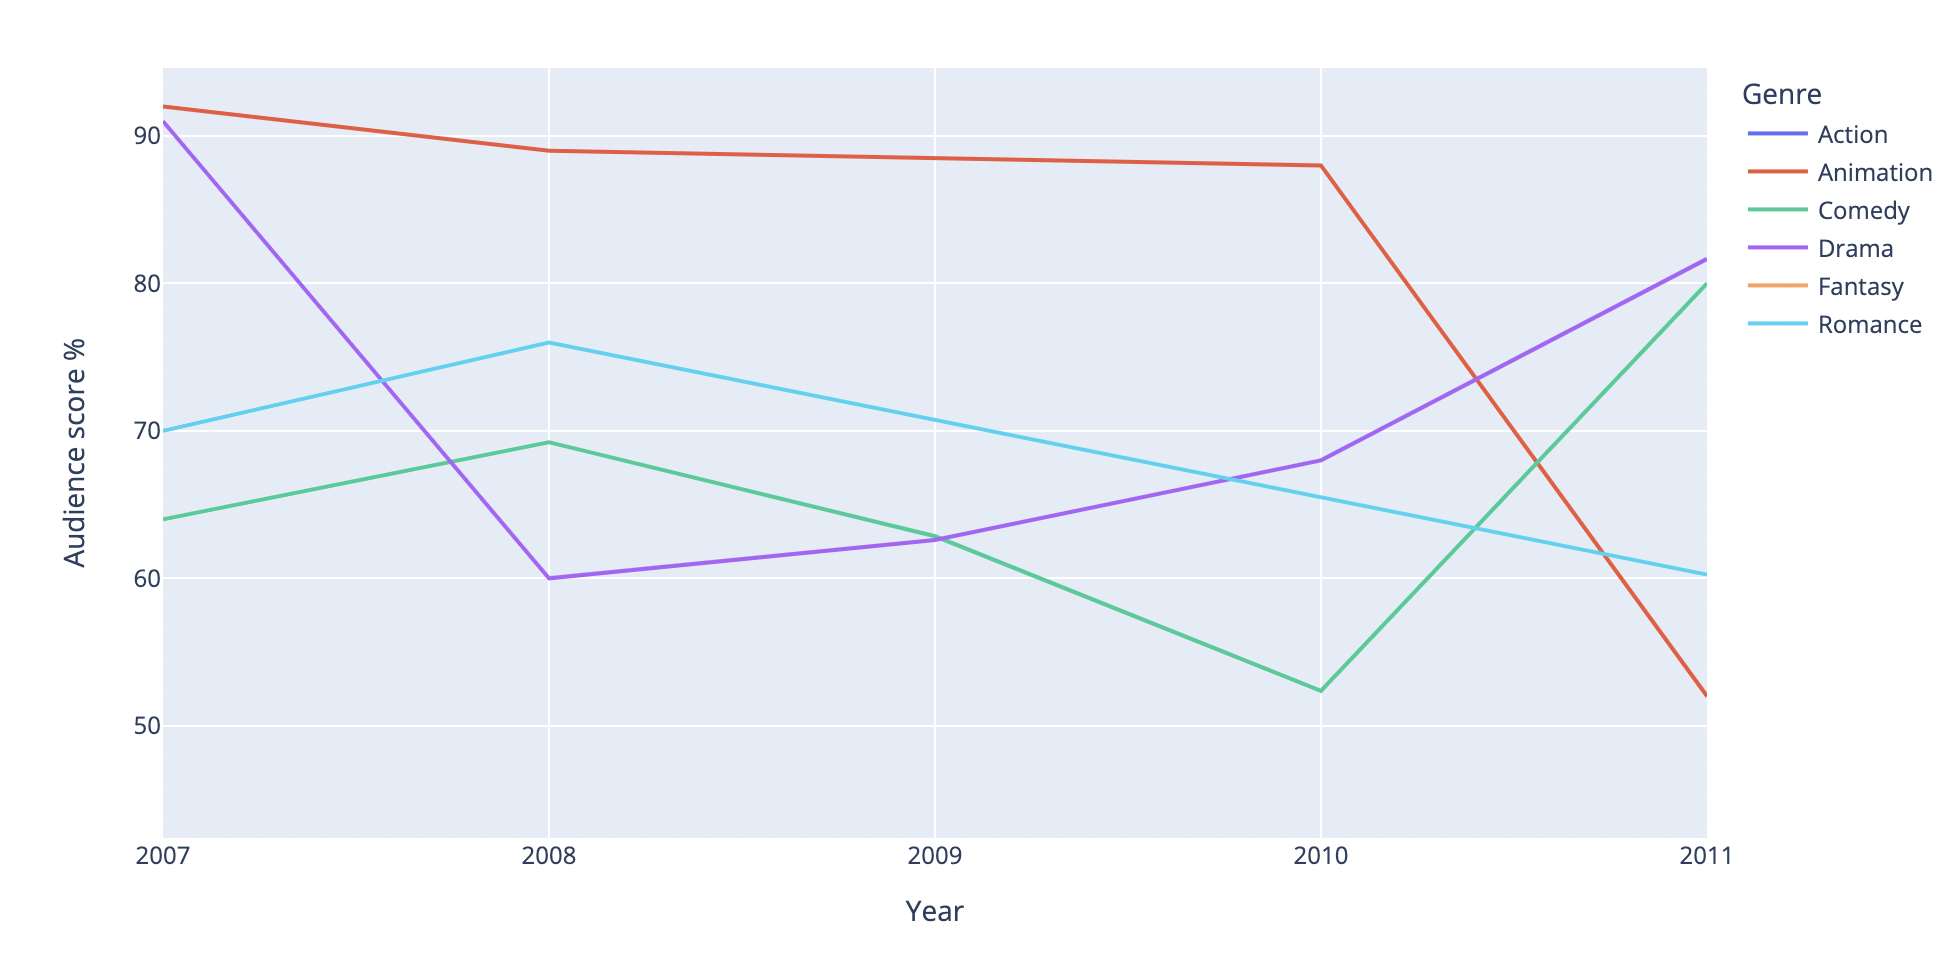


In [8]:
def movie_line(movie_data):
    averages = movie_data.groupby(['Genre', 'Year']).agg({'Audience score %':'mean'}).reset_index()
    fig = px.line(averages, x = 'Year', y = 'Audience score %', color = 'Genre', labels = {'Year': 'Year', 'averages': 'Audience score %'}, category_orders={'Genre': ["Action", "Animation", "Comedy", "Drama", "Fantasy", 'Romance']})
    fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 2007, dtick = 1))
    fig.show()



In [9]:
####Test Case####
movie_line(movie_data)

# Q4

You want to visualize a variety of the distrubtion of worldwide gross for each studio. Additionally, your friends ask to see the year for each studio, displayed as a color gradient. 

Generate a bar chart of each lead studio and its corresponding worldwide gross. Refer heavily to the expected output and the following documentation for help!
https://plotly.com/python/bar-charts/

**Input:**

    movie_data: Pd DataFrame of Movie Data

**Returns:**

    None: When function is run, bar graph is displayed
    
**Hints:** 

    - NO AGGREGATES ARE REQUIRED FOR THIS QUESTION
    - Pay attention to the datatype for the Worldwide Gross column
    - Pay close attention to chart and axis titles

**Expected Output**:
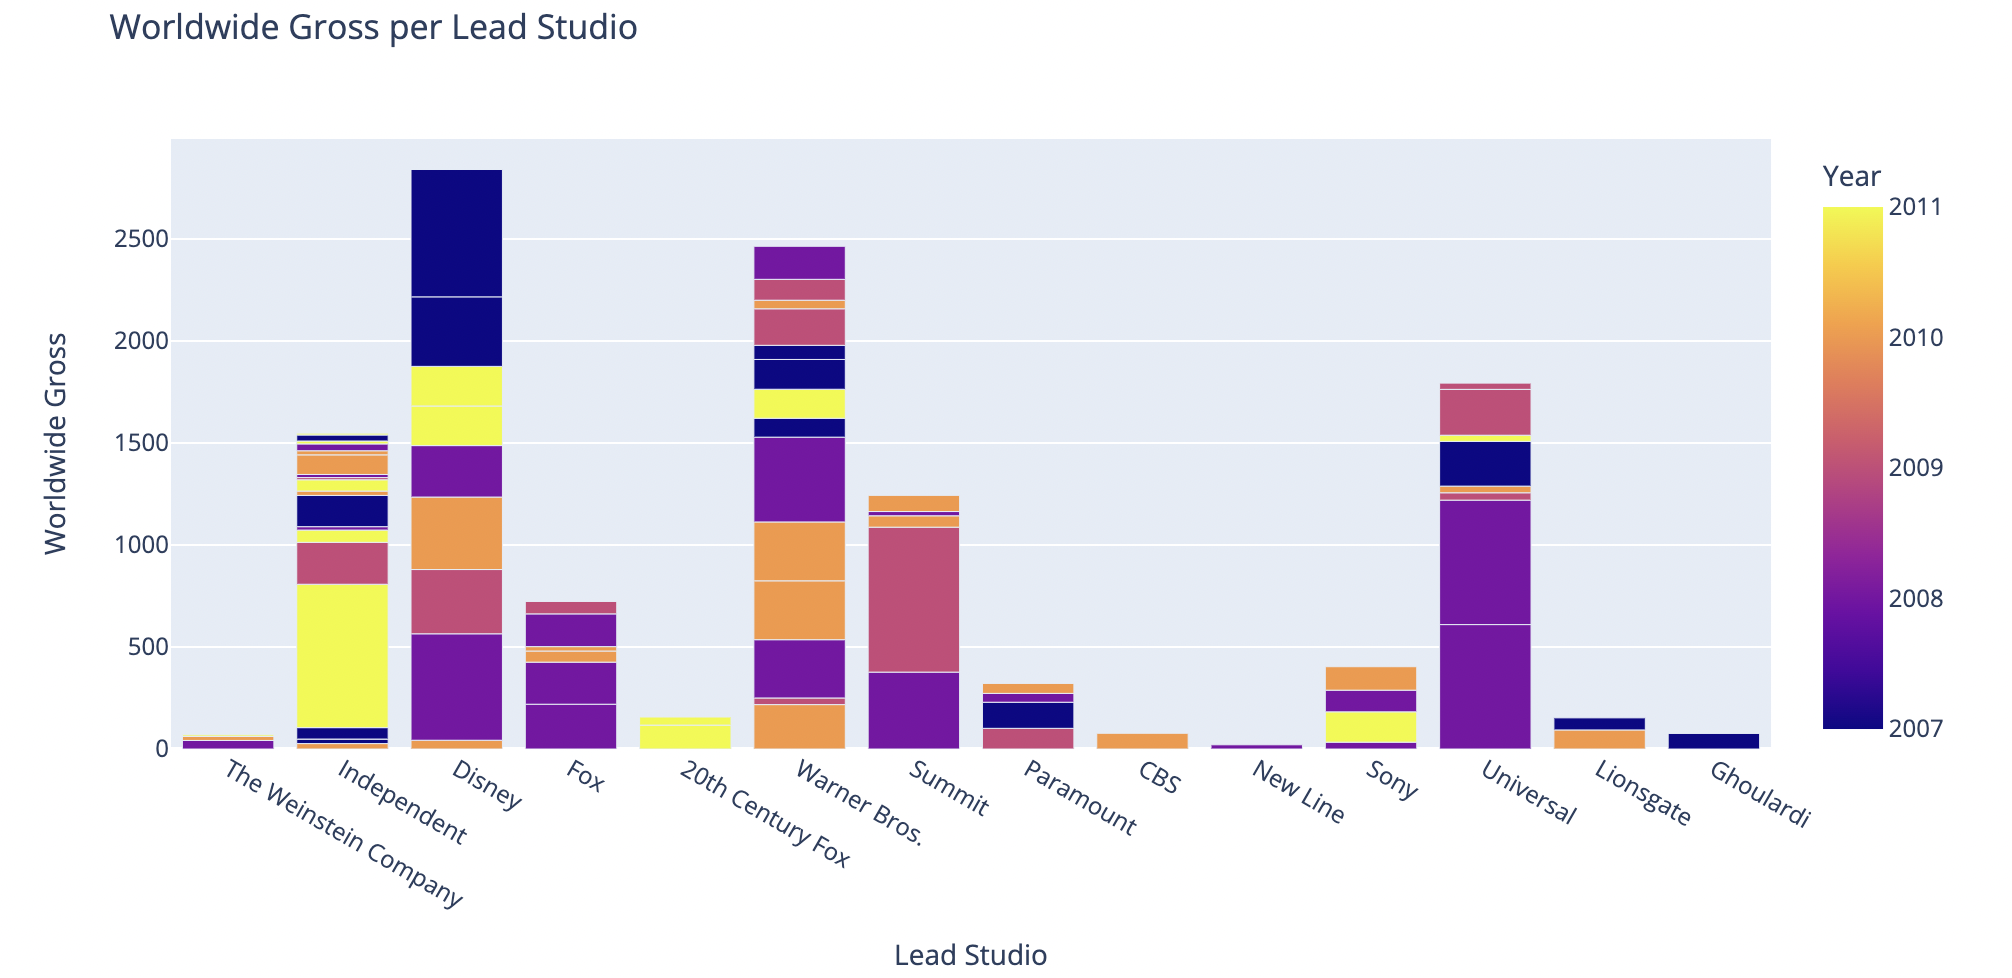

In [10]:
def movie_bar(movie_data):
    movie_data['gross'] = movie_data['Worldwide Gross'].str[1:].astype(float)
    fig = px.bar(movie_data, x = 'Lead Studio', y = 'gross', color = 'Year', labels = {'Lead Studio': 'Lead Studio', 'gross': 'Worldwide Gross'}, title = 'Worldwide Gross per Lead Studio')
    fig.update_layout(coloraxis={"colorbar":{"dtick":1}})
    fig.show()



In [11]:
####Test Case####
movie_bar(movie_data)

# Q5

One of your friends always checks the Rotten Tomatoes Score before watching any movie, and they want to watch a movie with higher than a score of 80. You do know that Rotten Tomatoes tends to score things a bit lower than needed, so you want to make sure to also count any movie that has an audience rating of 85. Return a box plot of the Rotten Tomatoes scores after doing so while displaying the data points used within it (check the documentation!)

**Input:**

    movie_data: Pd DataFrame of Movie Data

**Returns:**

    None: When function is run, box plot is displayed

**Hints:** 
    - Box Plot Documentation : https://plotly.com/python/box-plots/
    
    
**Expected Output:**
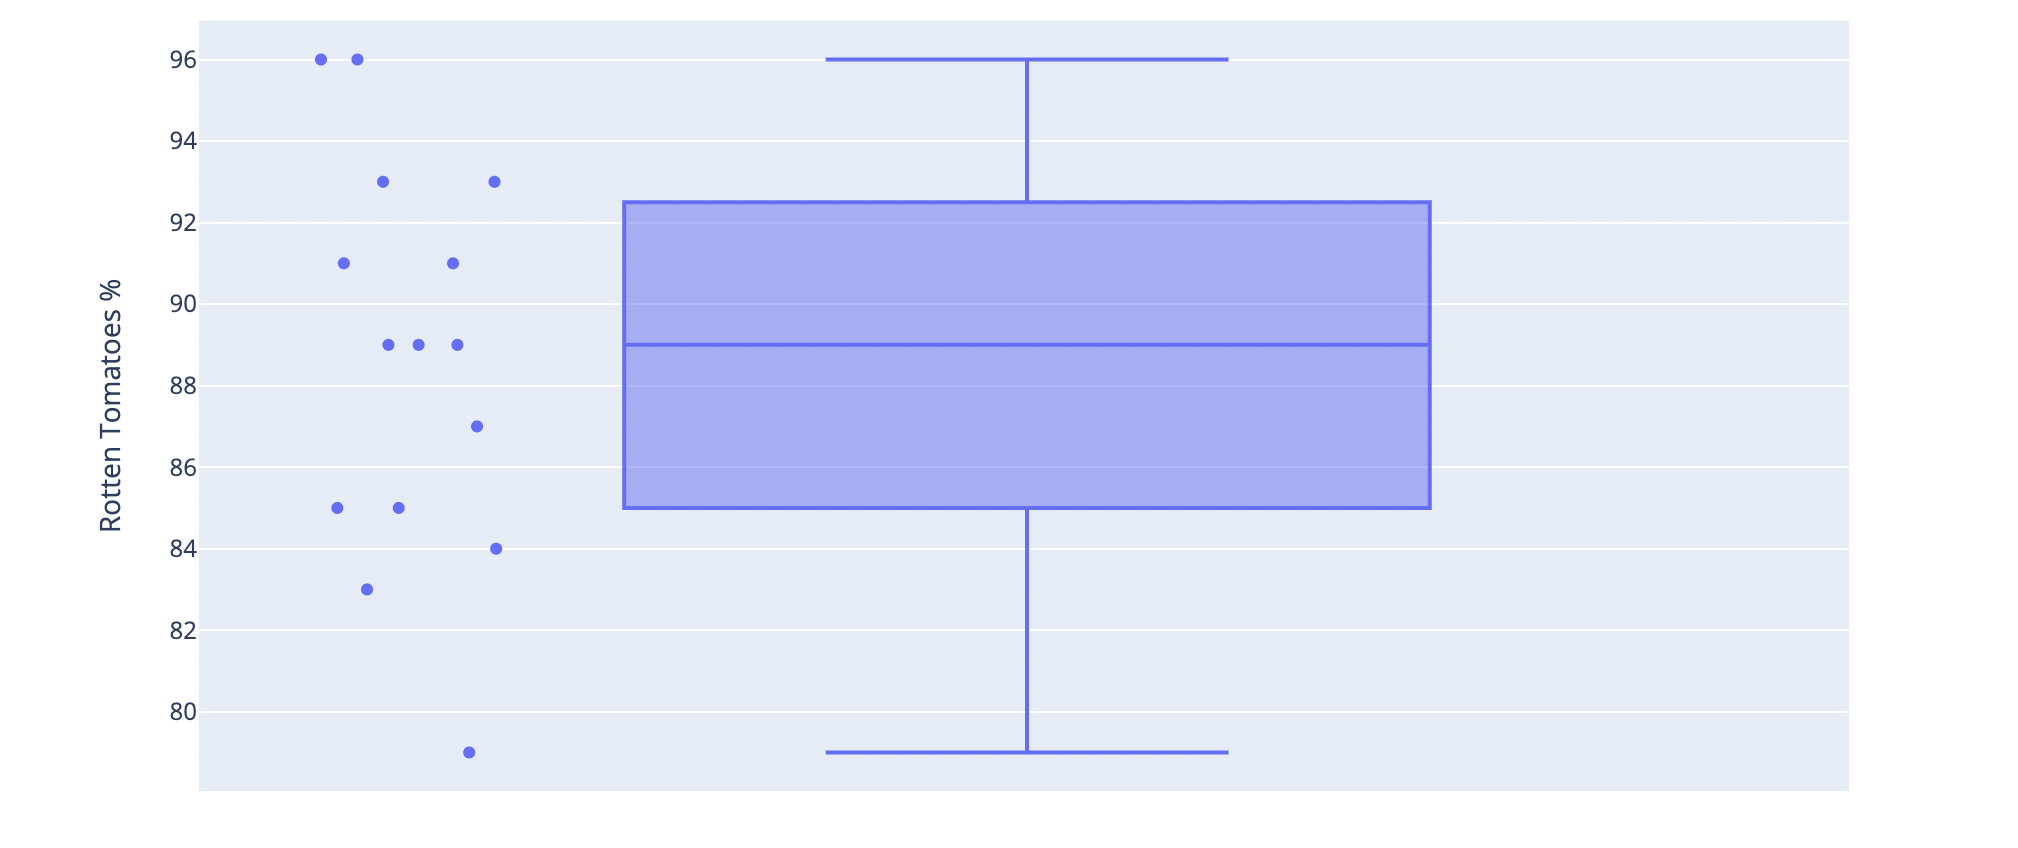

In [12]:
def movie_box(movie_data):
    movie_data = movie_data.loc[(movie_data['Audience score %'] >= 85) | (movie_data['Rotten Tomatoes %'] >= 80)]
    fig = px.box(movie_data, y="Rotten Tomatoes %", points = "all")
    fig.show()

In [13]:
###Test Case###
movie_box(movie_data)

# Q6 

You want to show your friends the distribution of movies per genre to help them finally make a decision. They're annoying you now. Construct a histogram to display this data. <b>The genres should be sorted in alphabetical order.</b> To make your data more appealing, change the color to indian red: https://plotly.com/python/histograms/

**Input:**

    movie_data: Pd DataFrame of Movie Data

**Returns:**

    None: When function is run, histogram is displayed
    
**Hints:** 
    - pay close attention to the axis titles  

**Expected Output**:
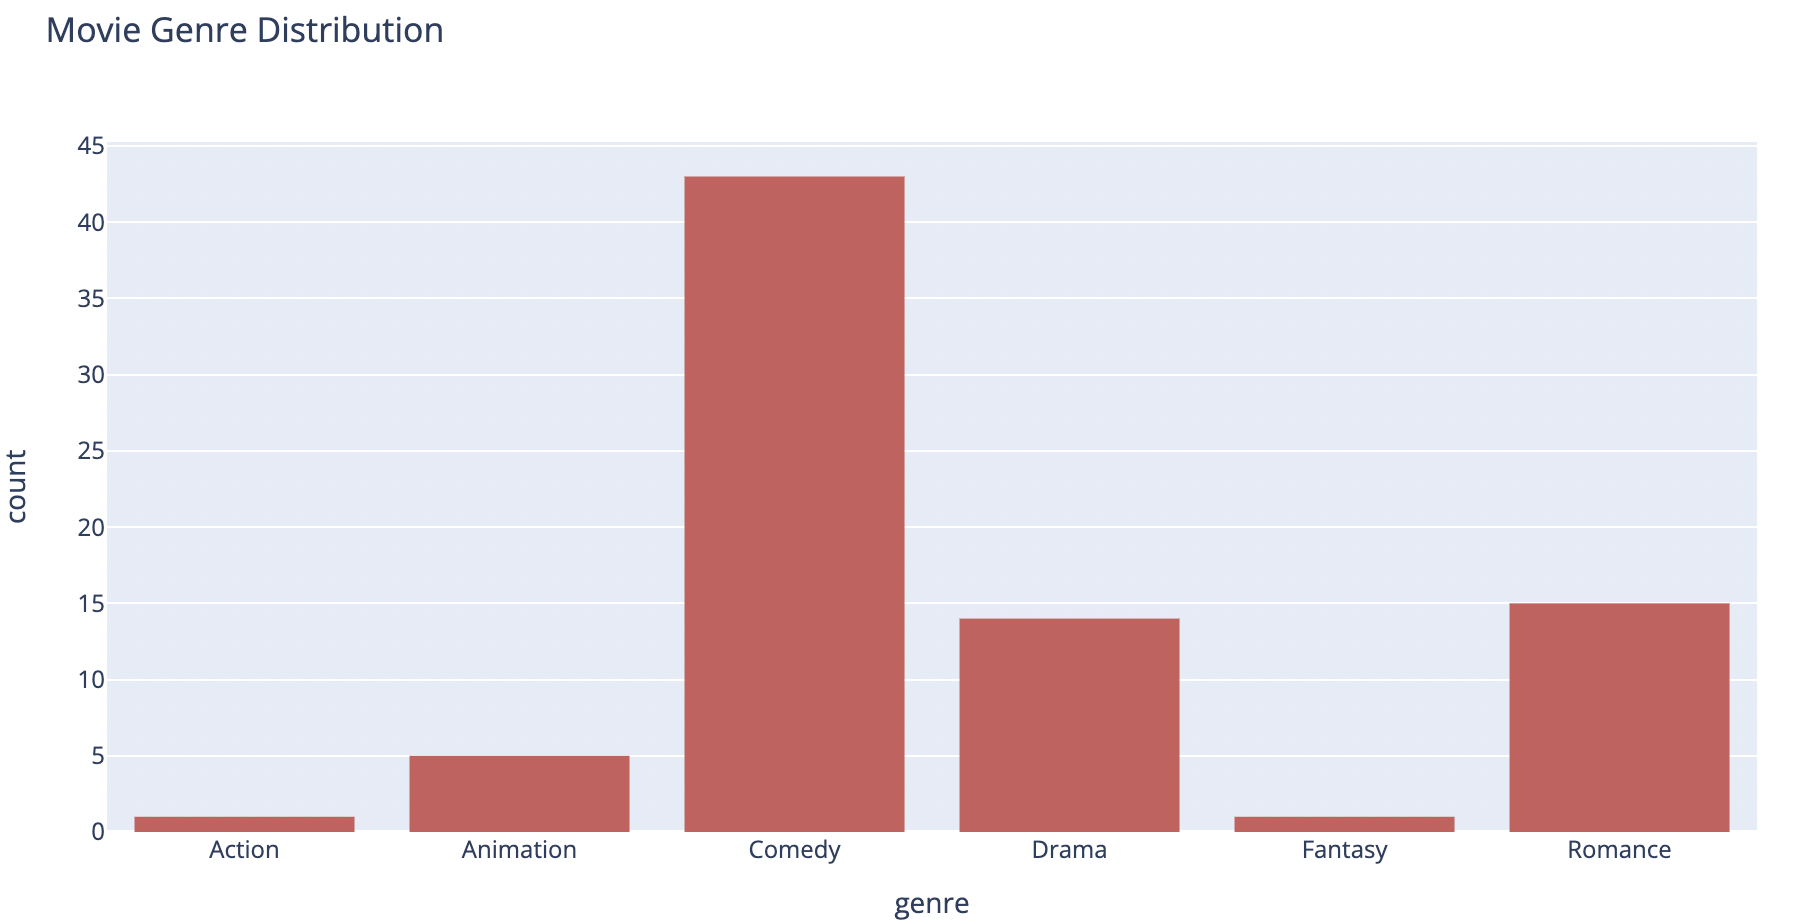

In [14]:
def movie_histogram(movie_data):
    fig = px.histogram(movie_data, x = "Genre", color_discrete_sequence=['indianred'], title = 'Movie Genre Distribution')
    fig.update_xaxes(categoryorder = "category ascending")
    fig.show()

In [15]:
###Test Case###
movie_histogram(movie_data)

# Extra Credit 

In [16]:
def your_function(movie_data):
    pass

In [17]:
###Test Case###
your_function(movie_data)

Please describe your analysis here: